# Home Prices in Monroe Township, NJ (USA) Single Variable Project
#### From: Adish Shah
#### Inspired by [codebasics](https://www.youtube.com/c/codebasics)
#### Source: Stack Overflow

## Importing Libraries



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

## Uploading Dataset CSV file from Local

#### Note:
#### Make sure to choose the correct CSV file in this case -> homeprices.csv

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving homeprices.csv to homeprices.csv


## Reading Dataset file and Creating Dataframe

In [ ]:
import io

df = pd.read_csv(io.BytesIO(uploaded['homeprices.csv']))
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


## Creating Scattered Plot of Given Dataset Points

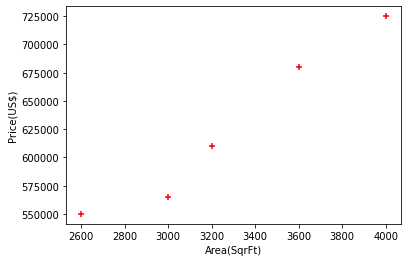

In [ ]:
%matplotlib inline
plt.xlabel("Area(SqrFt)")
plt.ylabel("Price(US$)")
plt.scatter(df.area, df.price, color="red", marker="+")

## Creating Training Variables from Dataset of Type Series

In [ ]:
X_train = df.area
Y_train = df.price
print(type(X_train))


<class 'pandas.core.series.Series'>


## Creating Linear Regression Model and Feeding it Training Data



### Note:
From the documentation, variable x should be declared as

x:{array-like, sparse matrix} of shape (n_samples, n_features)

When you declare:

x = df.area or x = df['area'] the x will become Series type with the size (n, ). The size should be (n, z), where z can be any positive integer.

x = df[['area']] the x will become DataFrame type with the size (5, 1) which makes an x an acceptable input.

y = df.price the y will become Series type with the size (5, ) which is an acceptable input.

y: array-like of shape (n_samples, )


In [ ]:
model = linear_model.LinearRegression()
model.fit(X_train.values.reshape(-1,1), Y_train)

LinearRegression()

## Testing Model by Giving it Random Inputs and Calculated Slope and Y-Intercept 

In [ ]:
model.predict([[3300]])

array([628715.75342466])

In [ ]:
model.predict([[5000]])

array([859554.79452055])

In [ ]:
model.coef_

array([135.78767123])

In [ ]:
model.intercept_

180616.43835616432

## Double Checking Prediction Value with Input [[3300]] from Model

In [ ]:
135.78767123*3300 + 180616.43835616432

628715.7534151643

## Creating Plot of ML Model and Comparing it to Dataset Points


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


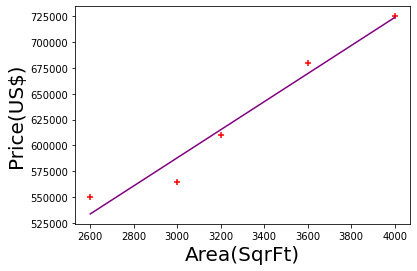

In [ ]:
%matplotlib inline
plt.xlabel("Area(SqrFt)", fontsize=20)
plt.ylabel("Price(US$)", fontsize=20)
plt.scatter(df.area, df.price, color="red", marker="+")
plt.plot(df.area,model.predict(df[['area']]), color="purple")

## Uploading Training Data to Let Model Predict the Price Based on Area (Using Same Model)

#### Note:
#### Make sure to choose the correct CSV file in this case -> areas.csv

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving areas.csv to areas.csv


In [ ]:
df2 = pd.read_csv(io.BytesIO(uploaded['areas.csv']))
df2

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [ ]:
price = model.predict(df2)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


## Adding Predictions of Prices from Model to the Dataframe

In [ ]:
df2['price'] = price

In [ ]:
df2

,area,price
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05
